## Step 5: Data pre-processing

Here we use new notebook so we need to some basic step before preprocessing......

In [ ]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Telsa_Stock.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    756 non-null    object 
 1   Open    756 non-null    float64
 2   High    756 non-null    float64
 3   Low     756 non-null    float64
 4   Close   756 non-null    float64
 5   Volume  756 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 35.6+ KB


In [60]:
df = df.drop(['Date'],axis=1)

In [61]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical(int) columns are ", len(int64_lst))
print(" Names: ", int64_lst)

Total number of numerical(int) columns are  1
 Names:  ['Volume']


In [62]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of numerical(float) columns are ", len(float64_lst))
print(" Names: ", float64_lst)

Total number of numerical(float) columns are  4
 Names:  ['Open', 'High', 'Low', 'Close']


---->>Here we encode variables from the dataset. This is main step for preprocessing.

In [63]:
encoder = OneHotEncoder()
for value in int64_lst:

    transformed = encoder.fit_transform(df[[value]])
    df[encoder.categories_[0]] = transformed.toarray()
int64_lst

['Volume']

In [64]:
df = df.drop(int64_lst, axis=1)

In [65]:
df.head()

,Open,High,Low,Close,710277,1333518,1422335,1554979,1615961,1659059,...,14863266,14915249,15354717,15649607,15962015,16464952,17046701,17261435,19324495,23742414
0,318.94,327.12,311.22,325.89,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,323.00,324.45,316.13,319.57,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335.50,341.49,321.04,323.47,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,336.89,339.60,332.51,335.07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,346.00,347.50,326.29,334.46,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# save preprocess dataframe to csv for model training . Using this dataset we train the model.
df.to_csv('Tesla_Stocke3.csv')

In [67]:
# Read preprocess csv file
df = pd.read_csv('Tesla_Stocke3.csv')

In [68]:
df = df.drop('Unnamed: 0',axis=1)

In [69]:
# View first 5 rows
df.head()

,Open,High,Low,Close,710277,1333518,1422335,1554979,1615961,1659059,...,14863266,14915249,15354717,15649607,15962015,16464952,17046701,17261435,19324495,23742414
0,318.94,327.12,311.22,325.89,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,323.00,324.45,316.13,319.57,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335.50,341.49,321.04,323.47,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,336.89,339.60,332.51,335.07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,346.00,347.50,326.29,334.46,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 6: Data Preparation
----->>Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
Split dataset into train and test dataset
Scaling on train dataset

In [70]:
## Here we choose Close as a target variable. And Spearate target and feature column in X and y variable.
target = 'Close'
X = df.drop(target,axis=1)
y = df[target]

In [71]:
# Check the shape of X and y variable
X.shape, y.shape

((756, 759), (756,))

In [72]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [73]:
# Again check the shape of X and y variable
X.shape, y.shape

((756, 759), (756, 1))

------>>>>Split dataset into train and test dataset

In [74]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((604, 759), (152, 759), (604, 1), (152, 1))

## Step 7: Model Training
------>>>>Here we train our dataset on different linear regression algorithms.

In [76]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

#### ----->>>>>Linear Regression (no regularization)

In [77]:
# define linear regression model object
lin_reg = LinearRegression()

In [78]:
# train or fit train dataset on linear regression model
lin_reg = lin_reg.fit(X_train, y_train)

In [79]:
# Get R2 score
lin_reg.score(X_train, y_train)

1.0

In [80]:
# get kfold values
lr_scores = -1 * cross_val_score(lin_reg, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([2.02320111, 1.65188896, 2.13665743, 1.83241296, 2.6994153 ,
       1.72031993, 2.03459761, 1.89363272, 1.84449808, 2.04344708])

In [ ]:
#mean of the train kfold scores
lr_score_train = np.mean(lr_scores)
lr_score_train

### Predict

In [82]:
# predict the values on X_test_scaled dataset 
y_predicted = lin_reg.predict(X_test)

In [83]:
# RMSE between y_test and y_predicted values
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

1.9442535743691862

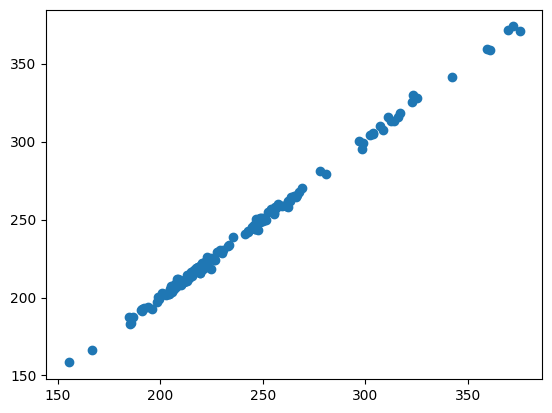

In [84]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

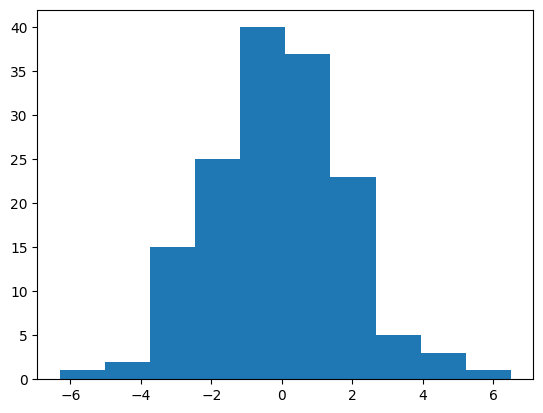

In [85]:
# histogram between y_test and y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

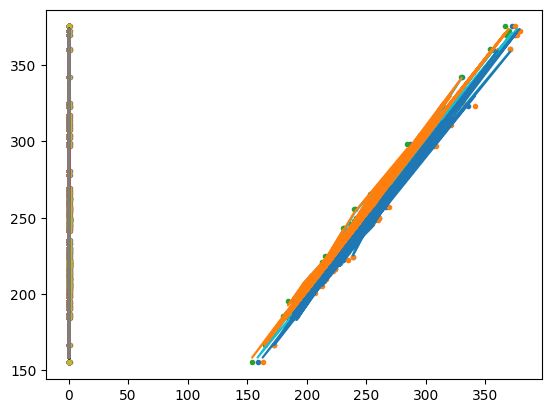

In [86]:
# fit graph between y_test and y_predicted values
plt.plot(X_test, y_test,'.')
plt.plot(X_test, y_predicted,'-')
plt.show()

#### ----->>>>> Lasso Regression (L1 regularization)

In [87]:
# define lasso regression model object
lasso_reg = LassoCV()

In [88]:
# train or fit train dataset on lasso regression model
lasso_reg = lasso_reg.fit(X_train, y_train)

In [89]:
# Get R2 score
lasso_reg.score(X_train, y_train)

0.9969121035577688

In [94]:
# get kfold values
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([2.58763728, 2.05654164, 2.46524209, 2.01176367, 2.76725981,
       2.15040192, 2.36060714, 2.40474251, 2.47607389, 2.02202859])

In [91]:
# mean of the train kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

2.3302298536442048

### Predict

In [95]:
# predict the values on X_test_scaled dataset 
y_predicted = lasso_reg.predict(X_test)

In [96]:
# RMSE between y_test and y_predicted values
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

2.2051519869431426

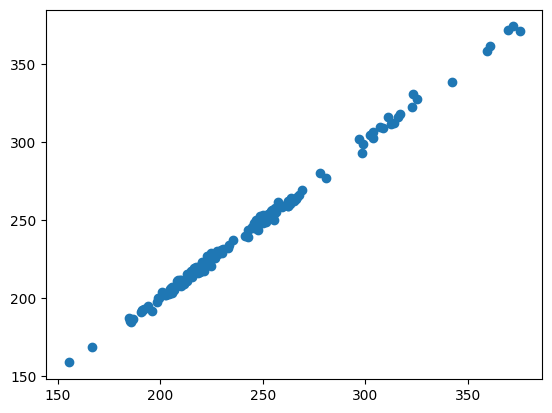

In [97]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

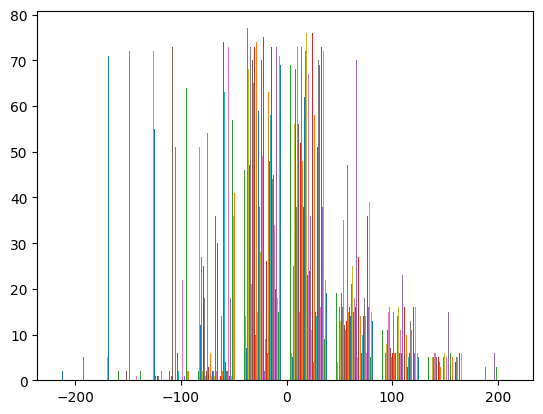

In [98]:
# histogram between y_test and y_predicted values
plt.hist(y_test - y_predicted)
plt.show()